In [19]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('finalDataset.csv')
df.columns
np.random.seed(8)

In [21]:
df["Rate"].value_counts()

5.0    224
4.0     50
3.0     28
1.0      3
0.0      3
2.0      3
Name: Rate, dtype: int64

C:\Users\Spark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


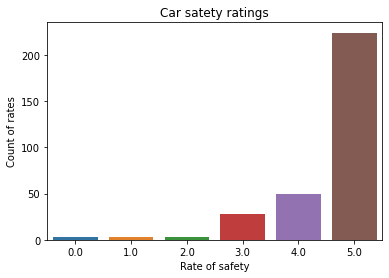

In [22]:
sns.countplot(df["Rate"])
plt.xlabel("Rate of safety")
plt.ylabel("Count of rates")
plt.title("Car satety ratings")
plt.show()

In [23]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
x.shape

(311, 17)

In [25]:
y.shape

(311,)

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, 
                                                   random_state=200)

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(criterion="gini",
                           max_depth=8,
                           min_samples_split=10,
                           random_state= 200)

In [61]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=200)

In [62]:
clf.feature_importances_

array([0.01686878, 0.14207072, 0.02170509, 0.0186908 , 0.02272336,
       0.00261917, 0.28137922, 0.19341822, 0.03391742, 0.03947461,
       0.03192754, 0.05958795, 0.00470972, 0.00306752, 0.11800169,
       0.00325339, 0.0065848 ])

In [63]:
df.columns

Index(['Centre Airbag-Driver', 'Vulnerable Road Users',
       'Centre Airbag-Passenger', 'Tested Model',
       'VIN From Which Rating Applies', 'Centre Airbag-Rear', 'Adult Occupant',
       'Safety Assist', 'Year Of Publication', 'Class', 'Lane Assist System',
       'Kerb Weight', 'AEB Vulnerable Road Users', 'Isofix/i-Size-Passenger',
       'Child Occupant', 'Knee Airbag-Rear', 'Front Airbag-Rear', 'Rate'],
      dtype='object')

In [64]:
y_pred=clf.predict(x_test)

In [65]:
y_pred

array([5., 5., 5., 5., 3., 1., 5., 5., 5., 5., 5., 3., 5., 5., 3., 3., 4.,
       5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 4., 4., 5., 5., 5., 5., 5.,
       5., 5., 4., 5., 5., 5., 5., 5., 3., 4., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 4.,
       4., 5., 4., 3., 5., 5., 5., 5., 5., 5.])

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  5,  2,  0],
       [ 0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  0,  0, 57]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9230769230769231

In [68]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, x_train, y_train, cv=10))

C:\Users\Spark\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


[0.83333333 0.83333333 0.95833333 0.95652174 0.91304348 0.91304348
 0.91304348 0.91304348 0.91304348 0.91304348]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         0
         1.0       1.00      1.00      1.00         1
         2.0       0.00      1.00      0.00         0
         3.0       0.71      0.71      0.71         7
         4.0       0.82      0.82      0.82        11
         5.0       1.00      0.97      0.98        59

    accuracy                           0.92        78
   macro avg       0.59      0.92      0.59        78
weighted avg       0.95      0.92      0.94        78

